In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv("car_insurance_premium_dataset.csv")

In [3]:
df.columns

Index(['Driver Age', 'Driver Experience', 'Previous Accidents',
       'Annual Mileage (x1000 km)', 'Car Manufacturing Year', 'Car Age',
       'Insurance Premium ($)'],
      dtype='object')

In [4]:
df.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55


In [5]:
df.tail()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
995,23,5,3,22,2020,5,500.00
996,43,8,3,17,2023,2,494.55
997,21,3,5,19,1998,27,506.05
998,36,18,1,23,2011,14,491.45
999,37,19,2,12,2002,23,492.80


In [6]:
df.describe()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.575000,14.759000,2.5680,17.933000,2007.637000,17.363000,493.742250
std,13.765677,10.544292,1.6989,4.410665,10.363331,10.363331,5.909689
min,18.000000,0.000000,0.0000,11.000000,1990.000000,0.000000,477.050000
25%,30.000000,6.000000,1.0000,14.000000,1999.000000,8.000000,489.487500
50%,42.000000,13.000000,3.0000,18.000000,2008.000000,17.000000,493.950000
75%,53.000000,23.000000,4.0000,22.000000,2017.000000,26.000000,498.312500
max,65.000000,40.000000,5.0000,25.000000,2025.000000,35.000000,508.150000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 1000 non-null   int64  
 1   Driver Experience          1000 non-null   int64  
 2   Previous Accidents         1000 non-null   int64  
 3   Annual Mileage (x1000 km)  1000 non-null   int64  
 4   Car Manufacturing Year     1000 non-null   int64  
 5   Car Age                    1000 non-null   int64  
 6   Insurance Premium ($)      1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


In [8]:
print("Nombre de doublons:", df.duplicated().sum())

Nombre de doublons: 0


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print("Nombre de doublons:", df.duplicated().sum())

Nombre de doublons: 0


In [11]:
print("Valeurs manquantes:", df.isnull().sum())

Valeurs manquantes: Driver Age                   0
Driver Experience            0
Previous Accidents           0
Annual Mileage (x1000 km)    0
Car Manufacturing Year       0
Car Age                      0
Insurance Premium ($)        0
dtype: int64


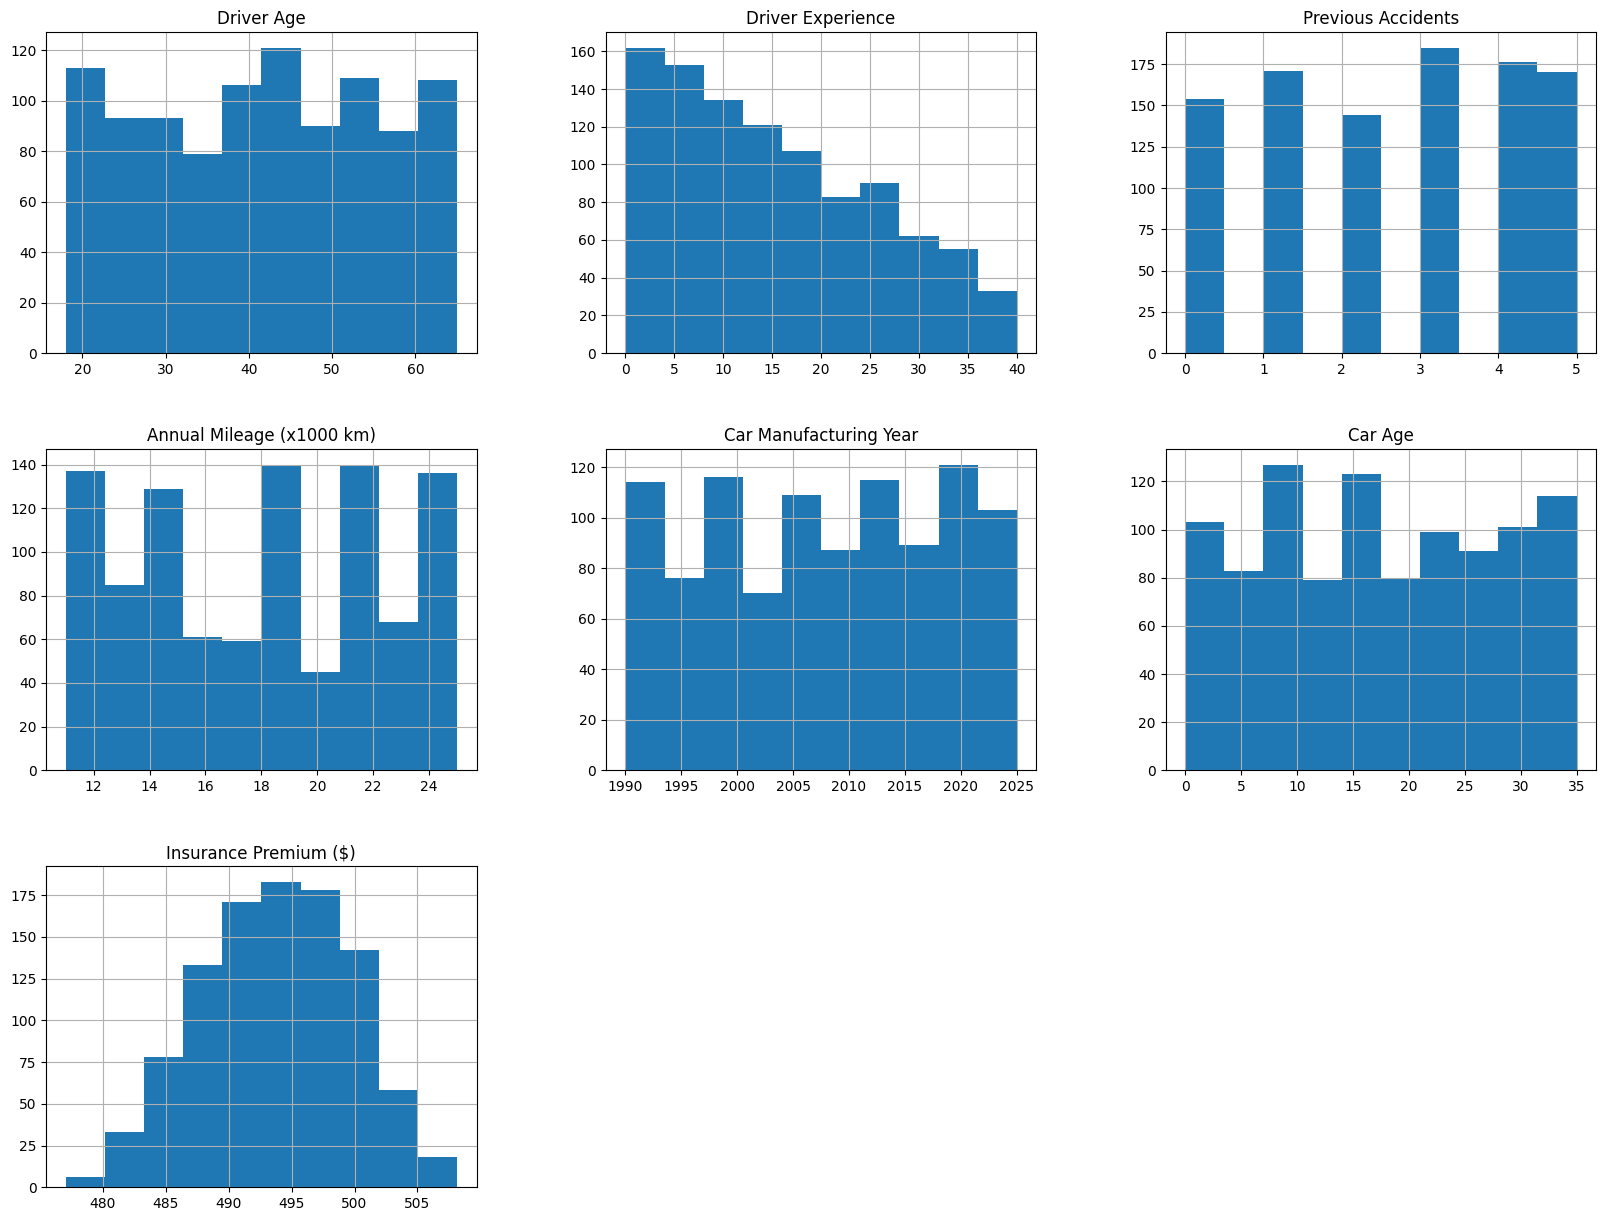

In [12]:
# Displying Histograms
df.hist(figsize=(20,15))
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

# Création d'un dictionnaire pour stocker les encoders
label_encoders = {}

# Sélectionner les colonnes catégorielles à encoder, en excluant 'price_category'
columns_to_encode = [col for col in df.select_dtypes(include=['object']).columns if col != 'price_category']

# Appliquer LabelEncoder à chaque colonne catégorielle
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Transformation des données en numériques
    label_encoders[col] = le  # Stockage de l'encoder pour chaque colonne

# Affichage du dataset après encodage
print("\nDataset after encoding categorical variables:")
print(df.head())


Dataset after encoding categorical variables:
   Driver Age  Driver Experience  Previous Accidents  \
0          56                 32                   4   
1          46                 19                   0   
2          32                 11                   4   
3          60                  0                   4   
4          25                  7                   0   

   Annual Mileage (x1000 km)  Car Manufacturing Year  Car Age  \
0                         17                    2002       23   
1                         21                    2025        0   
2                         15                    2020        5   
3                         19                    1991       34   
4                         13                    2005       20   

   Insurance Premium ($)  
0                 488.35  
1                 486.15  
2                 497.55  
3                 498.35  
4                 495.55  


In [14]:
import pandas as pd

In [15]:

try:
    df = pd.read_csv("car_insurance_premium_dataset.csv")
    print("Fichier CSV chargé avec succès.")
except FileNotFoundError:
    print("Erreur : le fichier CSV n'a pas été trouvé.")
    exit()

Fichier CSV chargé avec succès.


In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Normalisation des données avant la matrice de corrélation
scaler = StandardScaler()
df_normalized = df.copy()
df_normalized[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df[df.select_dtypes(include=[np.number]).columns])


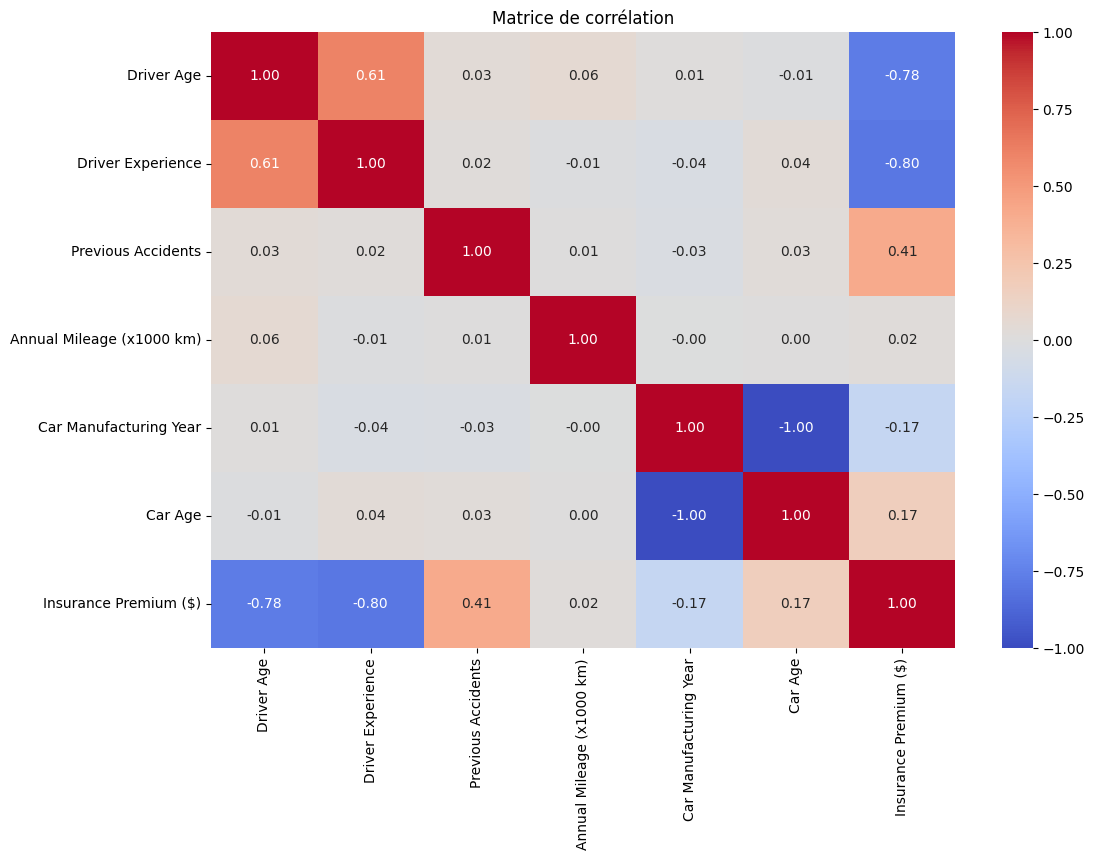

In [18]:
import matplotlib.pyplot as plt  # Pour les visualisations
import seaborn as sns  # Pour la heatmap

# Création de la matrice de corrélation    permettant de visualiser les relations entre les variables numériques du DataFrame normalisé.
plt.figure(figsize=(12, 8))
corr_matrix = df_normalized.corr()  # Matrice de corrélation après normalisation
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Matrice de corrélation')
plt.show()

In [19]:
# Affichage des corrélations avec la cible  et affiche les corrélations absolues entre la variable cible et les autres variables, puis sélectionne celles dont la corrélation dépasse un seuil défini (0.1).
target = 'Insurance Premium ($)'
if target in df_normalized.columns:
    print("\nCorrélations avec la cible (avant filtrage) :")
    print(corr_matrix[target].abs())

    # Sélection des caractéristiques bien corrélées avec la cible (target)
    correlation_threshold = 0.1  # Seuil de corrélation
    target_corr = corr_matrix[target].abs()
    selected_features = target_corr[target_corr > correlation_threshold].index.tolist()
    if target in selected_features:
        selected_features.remove(target)
    print(f"\nCaractéristiques sélectionnées corrélées avec {target} (|corr| > {correlation_threshold}) : {selected_features}")
else:
    print(f"\nErreur : la cible '{target}' n'est pas dans le dataset.")
    exit()



Corrélations avec la cible (avant filtrage) :
Driver Age                   0.776848
Driver Experience            0.803323
Previous Accidents           0.410786
Annual Mileage (x1000 km)    0.022131
Car Manufacturing Year       0.171829
Car Age                      0.171829
Insurance Premium ($)        1.000000
Name: Insurance Premium ($), dtype: float64

Caractéristiques sélectionnées corrélées avec Insurance Premium ($) (|corr| > 0.1) : ['Driver Age', 'Driver Experience', 'Previous Accidents', 'Car Manufacturing Year', 'Car Age']


In [20]:
#Ce code crée un nouveau DataFrame df_selected contenant uniquement les variables ayant une corrélation significative avec la cible, puis affiche ses premières lignes
df_selected = df_normalized[selected_features]
print(df_selected.head())

   Driver Age  Driver Experience  Previous Accidents  Car Manufacturing Year  \
0    1.048420           1.635921            0.843320               -0.544209   
1    0.321613           0.402409           -1.512322                1.676265   
2   -0.695919          -0.356675            0.843320                1.193553   
3    1.339144          -1.400415            0.843320               -1.606175   
4   -1.204684          -0.736217           -1.512322               -0.254582   

    Car Age  
0  0.544209  
1 -1.676265  
2 -1.193553  
3  1.606175  
4  0.254582  


In [21]:
#import the libraries KNNNNNNNNNNNNNN
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
from scipy import stats

In [22]:
#Read the dataset
df = pd.read_csv('car_insurance_premium_dataset.csv')

In [23]:
df.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55


In [24]:
df.shape

(1000, 7)

In [25]:
df.isnull().sum()

,0
Driver Age,0
Driver Experience,0
Previous Accidents,0
Annual Mileage (x1000 km),0
Car Manufacturing Year,0
Car Age,0
Insurance Premium ($),0


In [26]:
df.dtypes

,0
Driver Age,int64
Driver Experience,int64
Previous Accidents,int64
Annual Mileage (x1000 km),int64
Car Manufacturing Year,int64
Car Age,int64
Insurance Premium ($),float64


In [27]:
df.describe()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.575000,14.759000,2.5680,17.933000,2007.637000,17.363000,493.742250
std,13.765677,10.544292,1.6989,4.410665,10.363331,10.363331,5.909689
min,18.000000,0.000000,0.0000,11.000000,1990.000000,0.000000,477.050000
25%,30.000000,6.000000,1.0000,14.000000,1999.000000,8.000000,489.487500
50%,42.000000,13.000000,3.0000,18.000000,2008.000000,17.000000,493.950000
75%,53.000000,23.000000,4.0000,22.000000,2017.000000,26.000000,498.312500
max,65.000000,40.000000,5.0000,25.000000,2025.000000,35.000000,508.150000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 1000 non-null   int64  
 1   Driver Experience          1000 non-null   int64  
 2   Previous Accidents         1000 non-null   int64  
 3   Annual Mileage (x1000 km)  1000 non-null   int64  
 4   Car Manufacturing Year     1000 non-null   int64  
 5   Car Age                    1000 non-null   int64  
 6   Insurance Premium ($)      1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


In [29]:
df['Previous Accidents'].value_counts()


,count
Previous Accidents,
3,185
4,176
1,171
5,170
0,154
2,144


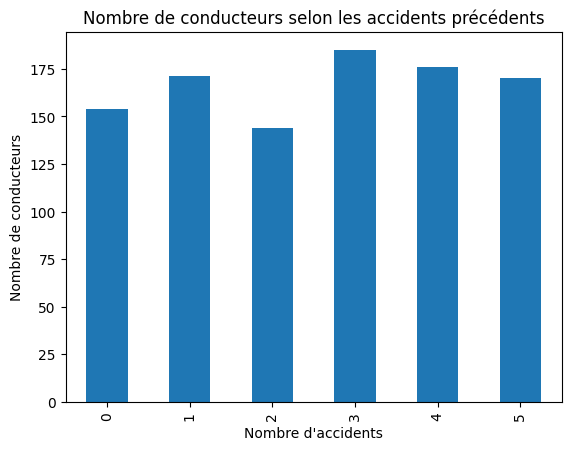

In [30]:
df['Previous Accidents'].value_counts().sort_index().plot(kind='bar')
plt.title("Nombre de conducteurs selon les accidents précédents")
plt.xlabel("Nombre d'accidents")
plt.ylabel("Nombre de conducteurs")
plt.show()


In [31]:
import pandas as pd

# Assurez-vous d'avoir votre DataFrame, ici il est supposé que le nom est 'df'

# Définir des plages pour la catégorie de prime d'assurance
bins = [477, 485, 495, 505, 508]  # Plages d'assurance
labels = ['Low', 'Medium', 'High', 'Very High']  # Étiquettes pour chaque catégorie

# Créer une nouvelle colonne 'premium_category' dans le DataFrame en fonction des primes
df['premium_category'] = pd.cut(df['Insurance Premium ($)'], bins=bins, labels=labels, right=False)
df.drop('Insurance Premium ($)', axis=1, inplace=True)
# Afficher les premières lignes pour vérifier
print(df.head())

# Voir la répartition des catégories
print(df['premium_category'].value_counts())



   Driver Age  Driver Experience  Previous Accidents  \
0          56                 32                   4   
1          46                 19                   0   
2          32                 11                   4   
3          60                  0                   4   
4          25                  7                   0   

   Annual Mileage (x1000 km)  Car Manufacturing Year  Car Age premium_category  
0                         17                    2002       23           Medium  
1                         21                    2025        0           Medium  
2                         15                    2020        5             High  
3                         19                    1991       34             High  
4                         13                    2005       20             High  
premium_category
Medium       481
High         425
Low           76
Very High     16
Name: count, dtype: int64


In [32]:
df['premium_category'].value_counts()

,count
premium_category,
Medium,481
High,425
Low,76
Very High,16


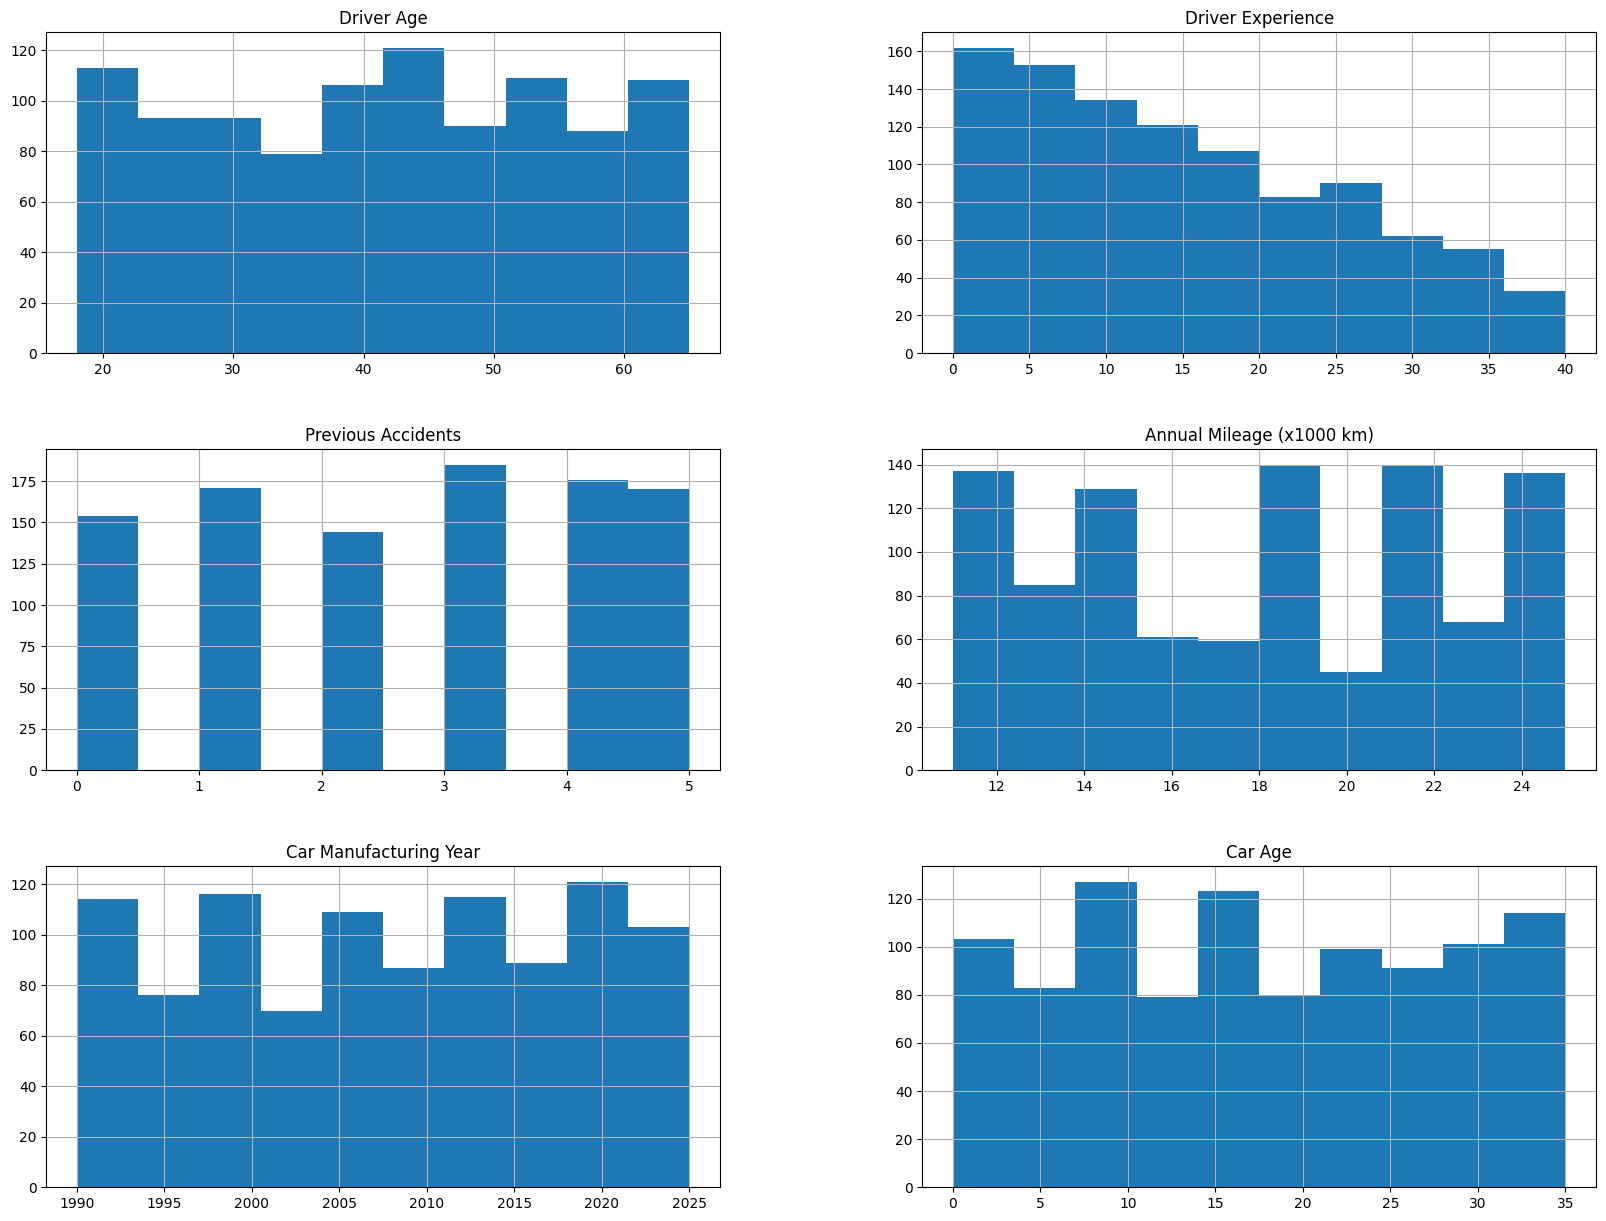

In [33]:
# Displying Histograms
df.hist(figsize=(20,15))
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Driver Age                 1000 non-null   int64   
 1   Driver Experience          1000 non-null   int64   
 2   Previous Accidents         1000 non-null   int64   
 3   Annual Mileage (x1000 km)  1000 non-null   int64   
 4   Car Manufacturing Year     1000 non-null   int64   
 5   Car Age                    1000 non-null   int64   
 6   premium_category           998 non-null    category
dtypes: category(1), int64(6)
memory usage: 48.2 KB


In [35]:
from sklearn.preprocessing import LabelEncoder

# Création d'un dictionnaire pour stocker les encoders
label_encoders = {}

# Sélectionner les colonnes catégorielles à encoder, en incluant 'premium_category'
columns_to_encode = [col for col in df.select_dtypes(include=['category']).columns if col != 'price_category']

# Appliquer LabelEncoder à chaque colonne catégorielle
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Transformation des données en numériques
    label_encoders[col] = le  # Stockage de l'encoder pour chaque colonne

# Affichage du dataset après encodage
print("\nDataset after encoding categorical variables:")
print(df.head())



Dataset after encoding categorical variables:
   Driver Age  Driver Experience  Previous Accidents  \
0          56                 32                   4   
1          46                 19                   0   
2          32                 11                   4   
3          60                  0                   4   
4          25                  7                   0   

   Annual Mileage (x1000 km)  Car Manufacturing Year  Car Age  \
0                         17                    2002       23   
1                         21                    2025        0   
2                         15                    2020        5   
3                         19                    1991       34   
4                         13                    2005       20   

   premium_category  
0                 2  
1                 2  
2                 0  
3                 0  
4                 0  


In [36]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Créer une copie du dataframe pour ne pas modifier l'original
df_normalized = df.copy()

# Sélectionner les colonnes numériques à normaliser (sauf la colonne cible 'premium_category')
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Enlever la colonne cible 'premium_category' de la liste des colonnes à normaliser
numeric_columns = numeric_columns[numeric_columns != 'premium_category']

# Appliquer StandardScaler sur les colonnes numériques (sauf 'premium_category')
scaler = StandardScaler()
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Afficher le dataset normalisé (sans modification de la colonne cible)
print("\nDataset after normalization (without normalizing 'premium_category'):")
print(df_normalized.head())



Dataset after normalization (without normalizing 'premium_category'):
   Driver Age  Driver Experience  Previous Accidents  \
0    1.048420           1.635921            0.843320   
1    0.321613           0.402409           -1.512322   
2   -0.695919          -0.356675            0.843320   
3    1.339144          -1.400415            0.843320   
4   -1.204684          -0.736217           -1.512322   

   Annual Mileage (x1000 km)  Car Manufacturing Year   Car Age  \
0                  -0.211639               -0.544209  0.544209   
1                   0.695708                1.676265 -1.676265   
2                  -0.665312                1.193553 -1.193553   
3                   0.242035               -1.606175  1.606175   
4                  -1.118985               -0.254582  0.254582   

   premium_category  
0                 2  
1                 2  
2                 0  
3                 0  
4                 0  


In [37]:
# Séparer les variables indépendantes (X) et la variable dépendante (y)
X = df_normalized.drop('premium_category', axis=1)  # On utilise 'premium_category' comme cible
y = df_normalized['premium_category']  # 'premium_category' est la cible


In [38]:
from sklearn.model_selection import train_test_split
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [39]:
#shape of our data
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 6) (800,)
Test set: (200, 6) (200,)


In [40]:
df_cleaned = df_normalized.dropna()


In [41]:
X = df_cleaned.drop('premium_category', axis=1)
y = df_cleaned['premium_category']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn_clf = KNeighborsClassifier(n_neighbors=k)
knn_clf.fit(X_train, y_train)

# Prédire à nouveau avec le bon modèle
y_pred = knn_clf.predict(X_test)

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))


Train set Accuracy:  0.95125
Test set Accuracy:  0.875


In [43]:
# Predict new observations
y_pred = knn_clf.predict(X_test)

In [44]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Train set Accuracy:  0.95125
Test set Accuracy:  0.875


In [45]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"The best accuracy was : {accuracy * 100:.2f}%")

The best accuracy was : 87.50%


In [46]:

from sklearn import metrics
Ks = 6
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.825, 0.86 , 0.88 , 0.875, 0.875])

In [47]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.88 with k= 3


In [48]:
import matplotlib.pyplot as plt

error_rates = []
k_values = range(1, 30)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred))


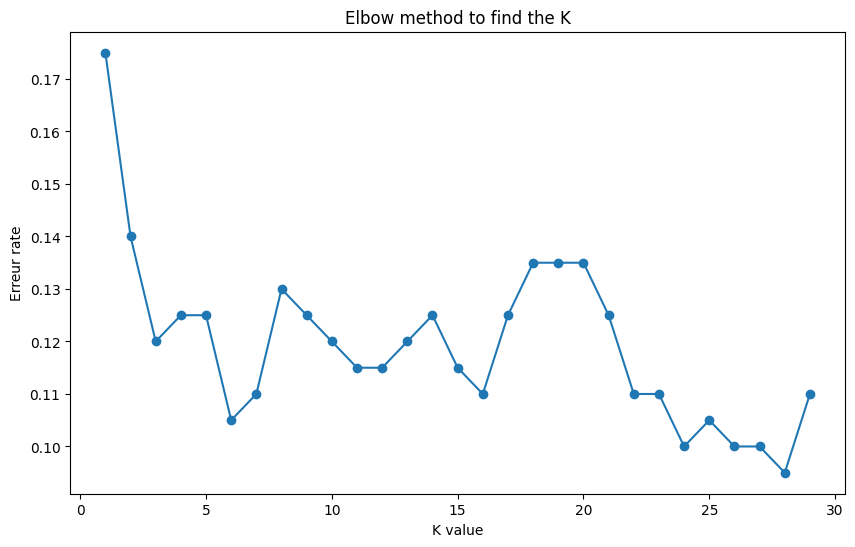

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o')
plt.title("Elbow method to find the K")
plt.xlabel("K value")
plt.ylabel("Erreur rate")
plt.show()


In [50]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_pred )

# Displaying the classification report
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        95
           1       1.00      0.43      0.60        14
           2       0.85      0.93      0.89        90
           3       0.00      0.00      0.00         1

    accuracy                           0.89       200
   macro avg       0.69      0.57      0.60       200
weighted avg       0.89      0.89      0.88       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


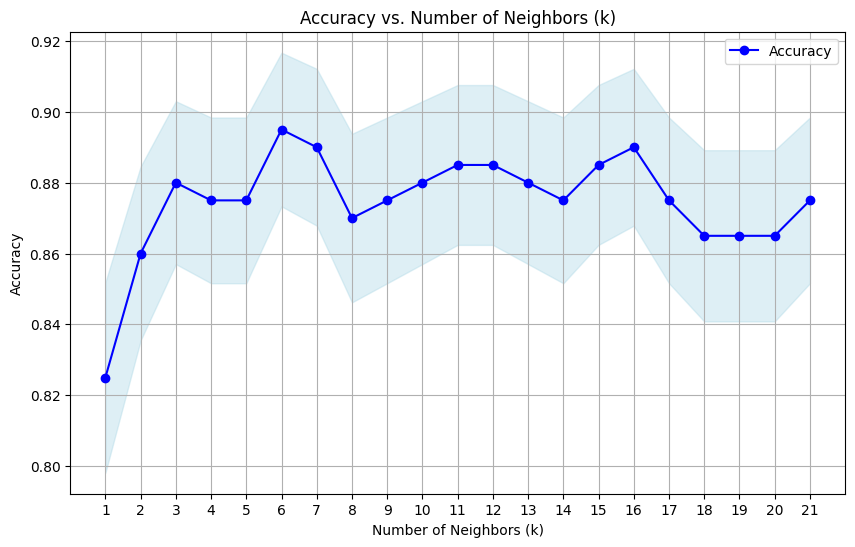


✅ The best accuracy was 0.90 with k = 6


In [51]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

Ks = 22  # Tester les valeurs de k de 1 à 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)
    std_acc[n-1] = np.std(y_pred == y_test) / np.sqrt(y_pred.shape[0])

# Affichage du graphe
plt.figure(figsize=(10,6))
plt.plot(range(1, Ks), mean_acc, 'bo-', label='Accuracy')
plt.fill_between(range(1, Ks), mean_acc - std_acc, mean_acc + std_acc, color='lightblue', alpha=0.4)
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, Ks, 1))
plt.legend()
plt.grid(True)
plt.show()

# Afficher la meilleure précision
best_k = mean_acc.argmax() + 1
best_acc = mean_acc.max()
print(f"\n✅ The best accuracy was {best_acc:.2f} with k = {best_k}")


In [52]:
# APPLYING SVM



# Import necessary libraries for SVM
from sklearn.svm import SVC
#Create a svm Classifier (you can choose different kernels like 'linear', 'rbf', etc.)
svm_model = SVC(kernel='rbf')  # rbf kernel is commonly used

# Train the SVM model
svm_model.fit(X_train, y_train)


SVC()

In [53]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [54]:
# accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.95125
Test set Accuracy:  0.95


In [55]:
pd.crosstab(y_test, y_pred)

col_0,0,1,2
premium_category,,,
0,91,0,4
1,0,12,2
2,3,0,87
3,1,0,0


In [56]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        95
           1       1.00      0.86      0.92        14
           2       0.94      0.97      0.95        90
           3       0.00      0.00      0.00         1

    accuracy                           0.95       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.95      0.95      0.95       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


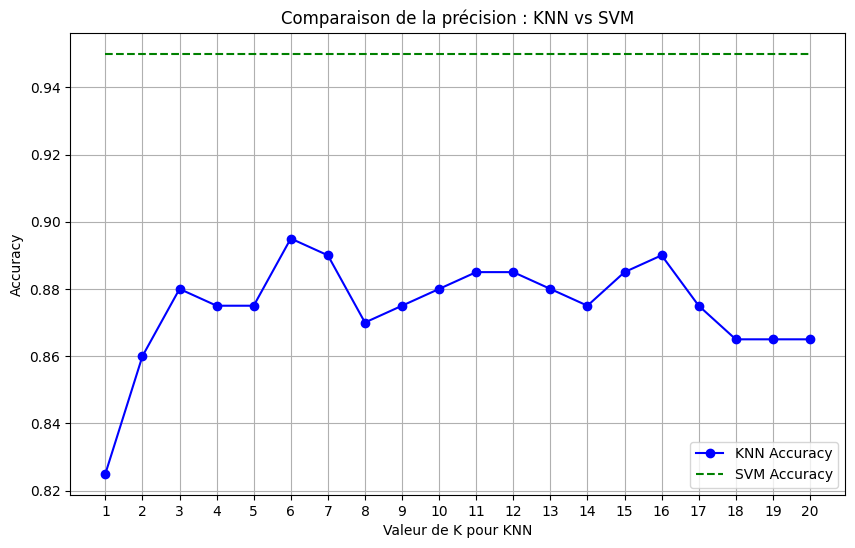

In [57]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np

# Liste des k à tester
Ks = 20
knn_accuracies = []

# Évaluer KNN pour chaque valeur de k
for k in range(1, Ks + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)

# Évaluer une seule fois SVM
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_acc = metrics.accuracy_score(y_test, svm_model.predict(X_test))

# Créer une liste constante avec la précision SVM pour chaque k (pour tracer la ligne horizontale)
svm_accuracies = [svm_acc] * Ks

# Tracer la courbe
plt.figure(figsize=(10,6))
plt.plot(range(1, Ks + 1), knn_accuracies, label='KNN Accuracy', marker='o', color='blue')
plt.plot(range(1, Ks + 1), svm_accuracies, label='SVM Accuracy', linestyle='--', color='green')
plt.title('Comparaison de la précision : KNN vs SVM')
plt.xlabel('Valeur de K pour KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(range(1, Ks + 1))
plt.show()


In [58]:
# # Setting up the environment
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.metrics import (classification_report,
#                              confusion_matrix,
#                              accuracy_score,
#                              ConfusionMatrixDisplay)
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler
# from sklearn.tree import DecisionTreeClassifier, export_text

In [59]:
# # Load the dataset
# df = pd.read_csv('car_insurance_premium_dataset.csv')

In [60]:
# # Display first 5 rows
# print("First 5 rows:")
# display(df.head())

In [61]:
# # pint the shape of data
# df.shape

In [62]:
# # Dataset information
# print("\nDataset info:")
# df.info()

In [63]:
# # check for nan values
# df.isna().sum()

In [64]:
# # drop nan values
# df.dropna(inplace=True)

In [65]:
# df.isna().sum()

In [66]:
# # check for duplicates
# df.duplicated().sum()

In [67]:
# print(df.columns)


In [68]:
# import pandas as pd

# # Charger les données modifiées (assurez-vous que le fichier CSV contient les données appropriées)
# df = pd.read_csv('Cleaned_Car_Insurance.csv')

# # Vérifier les colonnes disponibles après chargement
# print("Colonnes disponibles après chargement :", df.columns)

# # Si 'Cost_Per_Mileage' n'existe pas, la recréer
# if 'Cost_Per_Mileage' not in df.columns:
#     # Effectuer le calcul de la colonne 'Cost_Per_Mileage' si elle est absente
#     df['Cost_Per_Mileage'] = df['Insurance Premium ($)'] / df['Annual Mileage (x1000 km)']

# # Vérifier que la colonne 'Cost_Per_Mileage' est bien présente
# print("Colonnes après recalcul de 'Cost_Per_Mileage' :", df.columns)

# # Exemple d'accès aux données
# print(df[['Driver Age', 'Cost_Per_Mileage']].head())


In [69]:
# # Save the processed data
# df_new = pd.read_csv('Cleaned_Car_Insurance.csv')

In [70]:
# # Drop the Accidents_Per_Age containing a unique value equal to 1
# df_new = df_new.drop('Accidents_Per_Age', axis=1)

In [71]:
# # Handle categorical features
# # Encode target variable
# le = LabelEncoder()
# df_new['premium_category'] = le.fit_transform(df_new['premium_category'])

In [72]:
# # Calculate the frequency of each Previous Accidents value
# accidents_freq = df_new['Previous Accidents'].value_counts(normalize=True)

# # Map the frequencies to the Previous Accidents column
# df_new['Accidents_freq'] = df_new['Previous Accidents'].map(accidents_freq)

# # Drop the original Previous Accidents column
# df_new = df_new.drop('Previous Accidents', axis=1)

In [73]:
# Checking the features type
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 1000 non-null   float64
 1   Driver Experience          1000 non-null   float64
 2   Previous Accidents         1000 non-null   float64
 3   Annual Mileage (x1000 km)  1000 non-null   float64
 4   Car Manufacturing Year     1000 non-null   float64
 5   Car Age                    1000 non-null   float64
 6   premium_category           1000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 54.8 KB


In [74]:
df_new=df_cleaned.copy()
# Splitting the data
X = df_new.drop('premium_category', axis=1)
y = df_new['premium_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# prompt: affiche X et Y

# Assuming 'X' and 'Y' refer to the features (X) and target variable (y)
# from your data preprocessing steps.

# Display the first few rows of X (features)
print("First few rows of X (features):")
print(X.head())

# Display the first few rows of y (target variable)
print("\nFirst few rows of y (target variable):")
print(y.head())


First few rows of X (features):
   Driver Age  Driver Experience  Previous Accidents  \
0    1.048420           1.635921            0.843320   
1    0.321613           0.402409           -1.512322   
2   -0.695919          -0.356675            0.843320   
3    1.339144          -1.400415            0.843320   
4   -1.204684          -0.736217           -1.512322   

   Annual Mileage (x1000 km)  Car Manufacturing Year   Car Age  
0                  -0.211639               -0.544209  0.544209  
1                   0.695708                1.676265 -1.676265  
2                  -0.665312                1.193553 -1.193553  
3                   0.242035               -1.606175  1.606175  
4                  -1.118985               -0.254582  0.254582  

First few rows of y (target variable):
0    2
1    2
2    0
3    0
4    0
Name: premium_category, dtype: int64


In [76]:
from sklearn.tree import DecisionTreeClassifier

# Train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
# Predictions
y_pred = dt.predict(X_test)

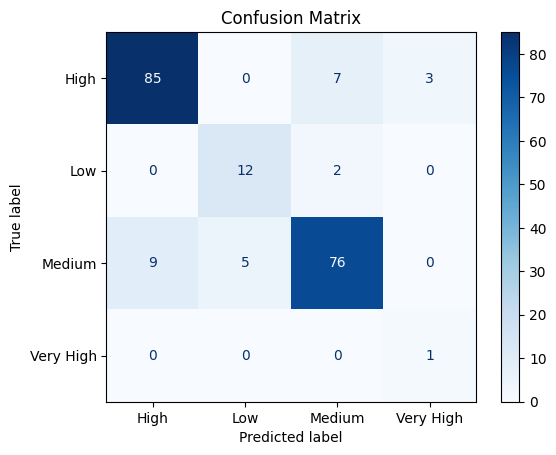

In [78]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Obtenir les vraies classes utilisées dans les prédictions
labels_present = unique_labels(y_test, y_pred)

# Générer la matrice de confusion uniquement avec les labels présents
cm = confusion_matrix(y_test, y_pred, labels=labels_present)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[le.classes_[i] for i in labels_present])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


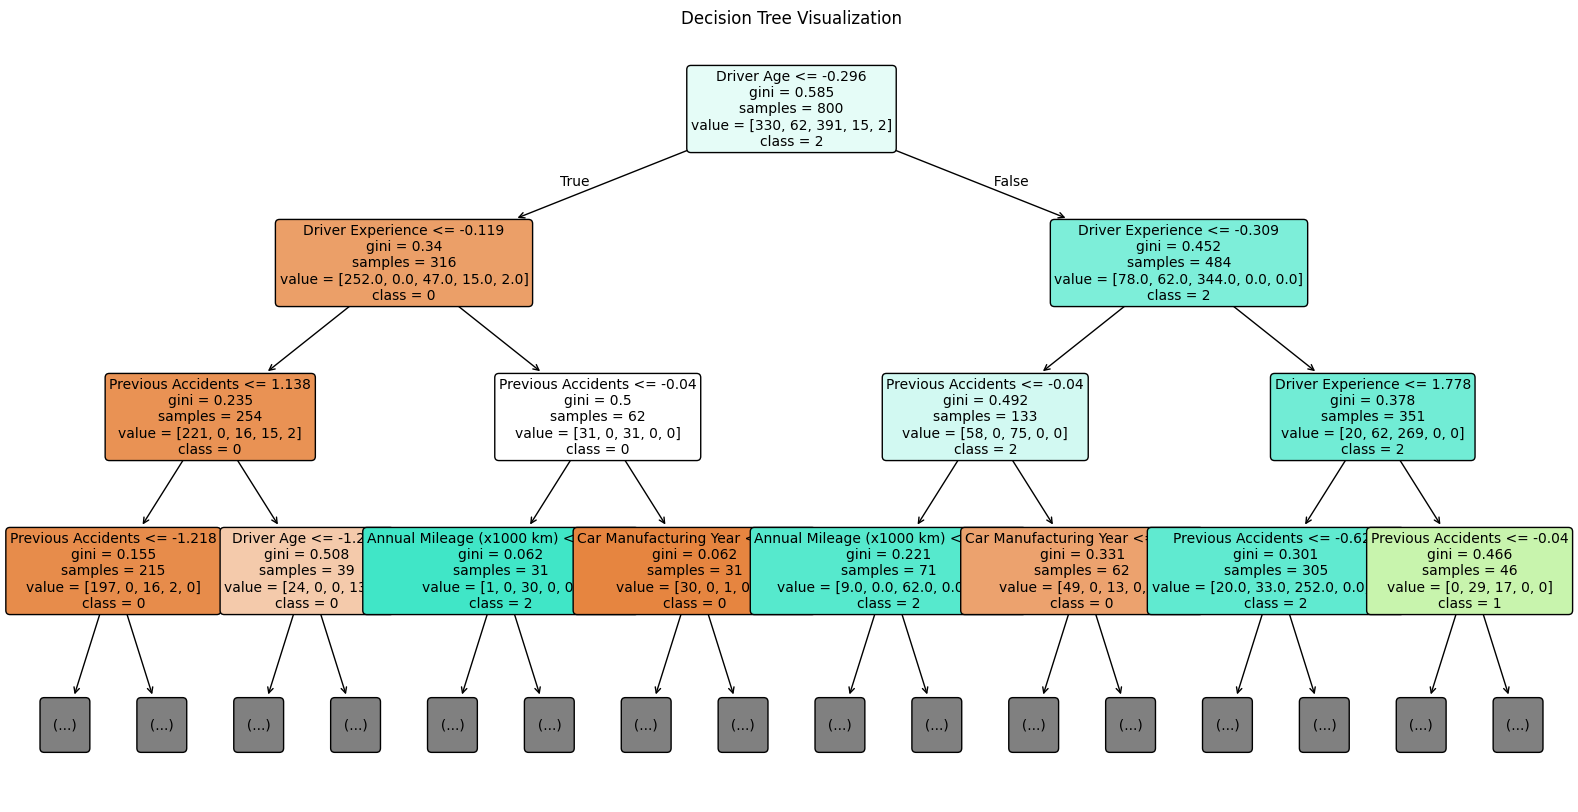

In [79]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    max_depth=3,
    feature_names=X.columns,
    class_names=dt.classes_.astype(str),  # ← correction ici
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Visualization')
plt.show()


In [80]:
from sklearn.tree import export_text


# Assuming 'dt' is your trained decision tree model
tree_rules = export_text(dt, feature_names=list(X.columns))

print(tree_rules)  # Display the rules

|--- Driver Age <= -0.30
|   |--- Driver Experience <= -0.12
|   |   |--- Previous Accidents <= 1.14
|   |   |   |--- Previous Accidents <= -1.22
|   |   |   |   |--- Driver Experience <= -0.59
|   |   |   |   |   |--- Car Age <= -0.61
|   |   |   |   |   |   |--- Driver Age <= -1.31
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Driver Age >  -1.31
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Car Age >  -0.61
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Driver Experience >  -0.59
|   |   |   |   |   |--- Car Manufacturing Year <= -1.36
|   |   |   |   |   |   |--- Annual Mileage (x1000 km) <= -0.78
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- Annual Mileage (x1000 km) >  -0.78
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Car Manufacturing Year >  -1.36
|   |   |   |   |   |   |--- class: 2
|   |   |   |--- Previous Accidents >  -1.22
|   |   |   |   |--- Driver Experience <= -0.

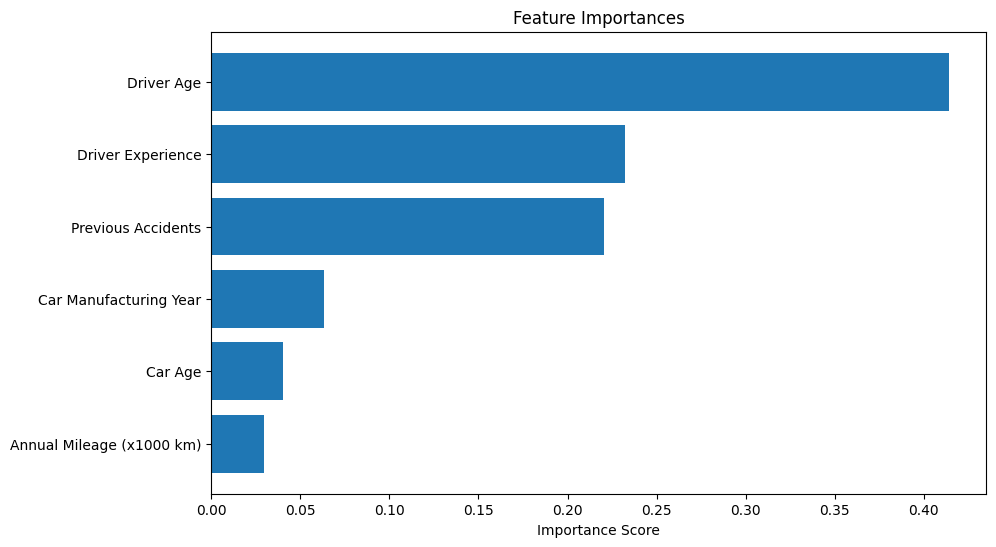

In [81]:

# Extraire et afficher les importances
importances = dt.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Tracer
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()

In [82]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

In [83]:
# import warnings

# warnings.filterwarnings('ignore')

In [84]:
# # Import dataset

# data = 'car_insurance_premium_dataset.csv'

# df = pd.read_csv(data)

In [85]:
# df.shape

In [86]:
# df.head()

In [87]:
# df.isnull().sum()

In [88]:
# X = df_cleaned.drop('premium_category', axis=1)
# y = df_cleaned['premium_category']


In [89]:
X.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age
0,1.048420,1.635921,0.843320,-0.211639,-0.544209,0.544209
1,0.321613,0.402409,-1.512322,0.695708,1.676265,-1.676265
2,-0.695919,-0.356675,0.843320,-0.665312,1.193553,-1.193553
3,1.339144,-1.400415,0.843320,0.242035,-1.606175,1.606175
4,-1.204684,-0.736217,-1.512322,-1.118985,-0.254582,0.254582


In [90]:
# # convert labels into binary values

# y[y == 2] = 0

# y[y == 1] = 1

In [91]:
# # import XGBoost
# import xgboost as xgb


# # define data_dmatrix
# data_dmatrix = xgb.DMatrix(data=X,label=y)

In [92]:
# # split X and y into training and testing sets

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [93]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from xgboost import XGBClassifier

# # On suppose que df est déjà défini
# # X : toutes les colonnes sauf la cible
# X = df.drop('Insurance Premium ($)', axis=1)

# # y : prédire si le premium dépasse 900 (classification binaire)
# y = (df['Insurance Premium ($)'] > 900).astype(int)  # 1 si >900, sinon 0

# # Split train/test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# # Définir les paramètres XGBoost
# params = {
#     'objective': 'binary:logistic',
#     'max_depth': 4,
#     'alpha': 10,
#     'learning_rate': 1.0,
#     'n_estimators': 100
# }

# # Créer le modèle
# xgb_clf = XGBClassifier(**params)

# # Entraîner le modèle
# xgb_clf.fit(X_train, y_train)


In [94]:
# # alternatively view the parameters of the xgb trained model
# print(xgb_clf)

In [95]:
# # make predictions on test data
# y_pred = xgb_clf.predict(X_test)

In [96]:
# # check accuracy score
# from sklearn.metrics import accuracy_score

# print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

   Driver Age  Driver Experience  Previous Accidents  \
0          56                 32                   4   
1          46                 19                   0   
2          32                 11                   4   
3          60                  0                   4   
4          25                  7                   0   

   Annual Mileage (x1000 km)  Car Manufacturing Year  Car Age  \
0                         17                    2002       23   
1                         21                    2025        0   
2                         15                    2020        5   
3                         19                    1991       34   
4                         13                    2005       20   

   Insurance Premium ($)  
0                 488.35  
1                 486.15  
2                 497.55  
3                 498.35  
4                 495.55  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   

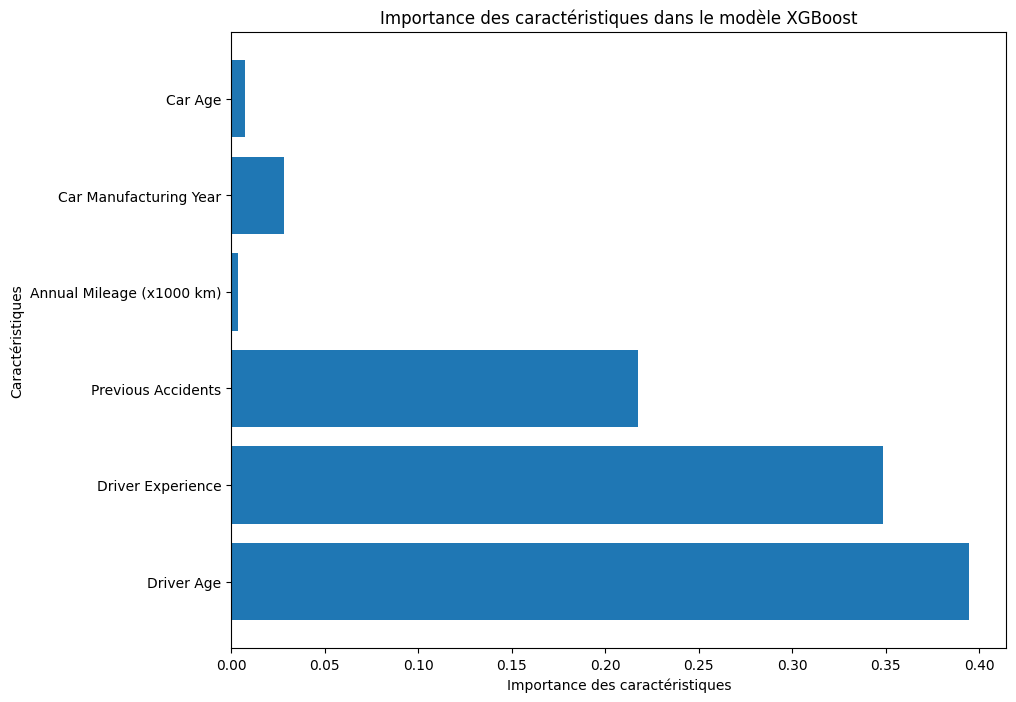

y_test: 993    490.30
859    495.35
298    497.50
553    491.40
672    483.10
971    486.45
27     486.55
231    496.35
306    490.70
706    492.35
Name: Insurance Premium ($), dtype: float64
y_pred: [490.28357 494.70575 497.3216  491.8347  484.68237 487.93796 487.98834
 497.06873 491.70883 492.3896 ]


In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from xgboost import XGBClassifier, XGBRegressor, DMatrix
import matplotlib.pyplot as plt

# Charger le dataset
# Assurez-vous de modifier le chemin du fichier selon vos besoins
df = pd.read_csv('car_insurance_premium_dataset.csv')

# Affiche les premières lignes du dataset pour avoir un aperçu des données
print(df.head())

# Si nécessaire, remplacer les valeurs manquantes (à ajuster selon vos données)
df.fillna(df.mean(), inplace=True)  # Remplir les NaN par la moyenne pour les colonnes numériques

# Afficher les informations générales du dataset
print(df.info())

# Sélectionner les caractéristiques (X) et la variable cible (y)
X = df.drop('Insurance Premium ($)', axis=1)  # Supposons que 'Insurance Premium ($)' soit la cible
y = df['Insurance Premium ($)']  # Variable cible

# Vérifier la distribution des classes cibles
print(y.value_counts())

# Si la variable cible est de type continu, utilisez XGBRegressor
# Si la variable cible est catégorielle (classification), utilisez XGBClassifier

# Pour un problème de régression (si y est continu), utilisez XGBRegressor :
if y.nunique() > 2:  # Si y contient plus de deux valeurs uniques
    model = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                         max_depth=5, alpha=10, n_estimators=100)
else:  # Si y contient deux classes ou moins
    model = XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Calculer le MSE (si c'est un problème de régression)
if isinstance(model, XGBRegressor):
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error sur les données de test: {mse:.4f}')

# Calculer l'accuracy (si c'est un problème de classification)
if isinstance(model, XGBClassifier):
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy du modèle XGBoost: {accuracy:.4f}')

# Visualisation de l'importance des caractéristiques
plt.figure(figsize=(10, 8))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel('Importance des caractéristiques')
plt.ylabel('Caractéristiques')
plt.title('Importance des caractéristiques dans le modèle XGBoost')
plt.show()

# Afficher les premières valeurs de y_test et y_pred pour la comparaison
print("y_test:", y_test[:10])
print("y_pred:", y_pred[:10])


🔍 Résultats de l'évaluation :
✅ MSE : 0.3215
✅ RMSE : 0.5670
✅ R² score : 0.9903

📊 Comparaison des 5 premières prédictions :
➡️ Réel: 499.35 | Prédit: 499.010009765625
➡️ Réel: 496.75 | Prédit: 496.69000244140625
➡️ Réel: 489.1 | Prédit: 490.05999755859375
➡️ Réel: 502.25 | Prédit: 502.239990234375
➡️ Réel: 498.85 | Prédit: 498.2699890136719


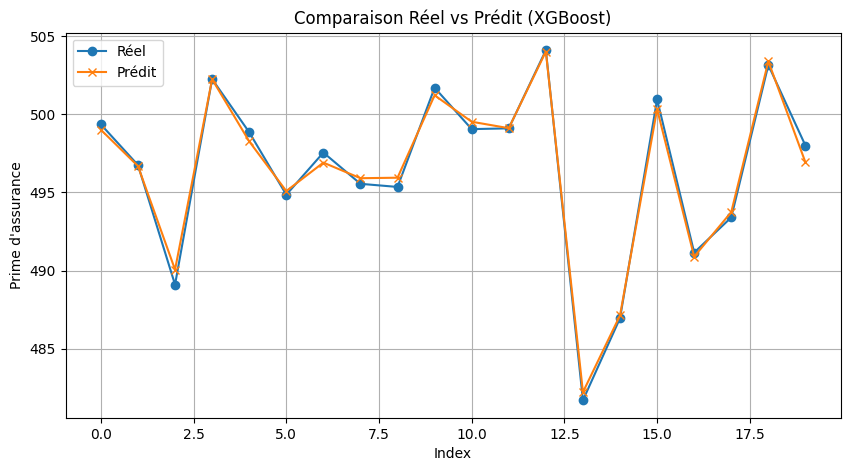

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt

# ----------- Charger les données -----------

df = pd.read_csv("car_insurance_premium_dataset.csv")

# ----------- Séparation des variables -----------

X = df.drop("Insurance Premium ($)", axis=1)
y = df["Insurance Premium ($)"]

# ----------- Séparation en train / test -----------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ----------- Modèle XGBoost -----------

model = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=4)
model.fit(X_train, y_train)

# ----------- Prédiction -----------

y_pred = model.predict(X_test)

# ----------- Évaluation -----------

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("🔍 Résultats de l'évaluation :")
print(f"✅ MSE : {mse:.4f}")
print(f"✅ RMSE : {rmse:.4f}")
print(f"✅ R² score : {r2:.4f}")

# ----------- Comparaison réelle vs prédite (5 premiers) -----------

print("\n📊 Comparaison des 5 premières prédictions :")
for actual, pred in zip(y_test[:5], y_pred[:5]):
    print(f"➡️ Réel: {round(actual, 2)} | Prédit: {round(pred, 2)}")

# ----------- Graphique pour visualiser -----------

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:20], label='Réel', marker='o')
plt.plot(y_pred[:20], label='Prédit', marker='x')
plt.title("Comparaison Réel vs Prédit (XGBoost)")
plt.xlabel("Index")
plt.ylabel("Prime d'assurance")
plt.legend()
plt.grid(True)
plt.show()


📊 Mean Squared Error (MSE): 0.5540
📈 R² Score: 0.9837


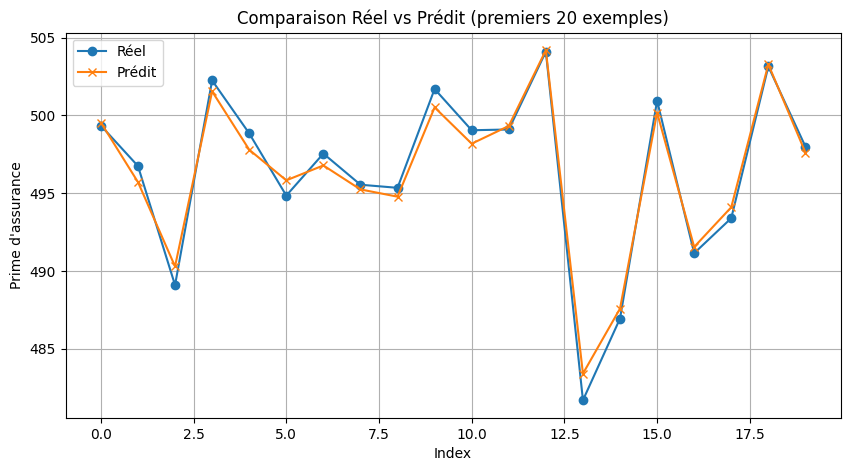

In [99]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Charger les données depuis ton fichier CSV Random foresssssssssssssssstttttttttttttt
df = pd.read_csv("car_insurance_premium_dataset.csv")

# 2. Séparer les features (X) et la cible (y)
X = df.drop("Insurance Premium ($)", axis=1)
y = df["Insurance Premium ($)"]

# 3. Séparer les données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Créer et entraîner le modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Faire les prédictions
y_pred = model.predict(X_test)

# 6. Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Mean Squared Error (MSE): {mse:.4f}")
print(f"📈 R² Score: {r2:.4f}")

# 7. Comparaison visuelle : Réel vs Prédit
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:20], label='Réel', marker='o')
plt.plot(y_pred[:20], label='Prédit', marker='x')
plt.title("Comparaison Réel vs Prédit (premiers 20 exemples)")
plt.xlabel("Index")
plt.ylabel("Prime d'assurance")
plt.legend()
plt.grid(True)
plt.show()


⚠️ VIF élevé détecté : Car Manufacturing Year = 29.52 → supprimé
⚠️ VIF élevé détecté : Driver Age = 12.77 → supprimé
⚠️ VIF élevé détecté : Annual Mileage (x1000 km) = 5.40 → supprimé
✅ Multicolinéarité éliminée

✅ VIF final :
 Car Age               2.589925
Previous Accidents    2.429048
Driver Experience     2.291808
dtype: float64
📊 Nombre de variables restantes : 3


<ipython-input-100-e40e2c47bc63>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients_table, y='Variable', x='Coefficient', palette='viridis')
<ipython-input-100-e40e2c47bc63>:66: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


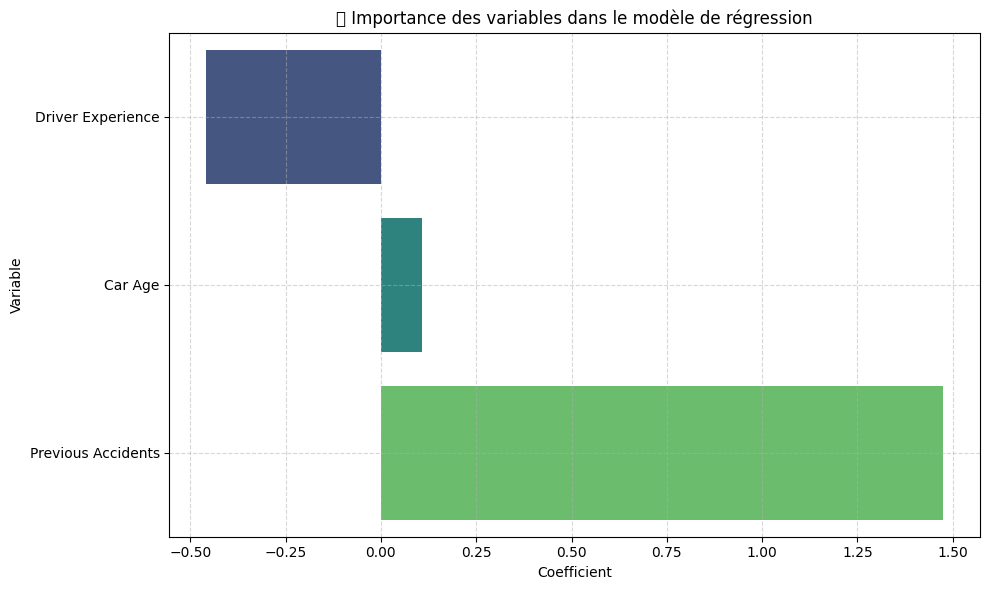

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Étape 1 : copie du X_train
vif_data = X_train.copy()

# Étape 2 : suppression des colonnes constantes (zéro variance)
vif_data = vif_data.loc[:, vif_data.std() > 0]

# Étape 3 : fonction pour calculer les VIF
def calculate_vif(df):
    vif = pd.Series(
        [variance_inflation_factor(df.values, i) for i in range(df.shape[1])],
        index=df.columns
    )
    return vif

# Étape 4 : suppression automatique des variables avec VIF > seuil
def remove_multicollinearity(df, threshold=5.0):
    iteration = 0
    while True:
        vif = calculate_vif(df)
        max_vif = vif.max()
        if max_vif > threshold:
            var_to_remove = vif.idxmax()
            print(f"⚠️ VIF élevé détecté : {var_to_remove} = {max_vif:.2f} → supprimé")
            df = df.drop(columns=[var_to_remove])
            iteration += 1
            if df.shape[1] <= 1:
                print("❌ Trop peu de variables restantes, arrêt.")
                break
        else:
            print("✅ Multicolinéarité éliminée")
            break
    return df

# Étape 5 : nettoyage
vif_data_clean = remove_multicollinearity(vif_data)

# Étape 6 : VIF final
final_vif = calculate_vif(vif_data_clean).sort_values(ascending=False)
print("\n✅ VIF final :\n", final_vif)
print("📊 Nombre de variables restantes :", len(vif_data_clean.columns))

# Étape 7 : régression
reg = LinearRegression()
reg.fit(vif_data_clean, y_train)

# Étape 8 : visualisation des coefficients
coefficients_table = pd.DataFrame({
    'Variable': vif_data_clean.columns,
    'Coefficient': reg.coef_.flatten()
}).sort_values(by='Coefficient')

# Étape 9 : affichage
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients_table, y='Variable', x='Coefficient', palette='viridis')
plt.title("🎯 Importance des variables dans le modèle de régression")
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


❌ Car Manufacturing Year supprimée (VIF = 29.52)
❌ Driver Age supprimée (VIF = 12.77)
❌ Annual Mileage (x1000 km) supprimée (VIF = 5.40)
✅ Aucune multicolinéarité restante.

📈 R² : 0.8664
📉 MSE : 4.53


<ipython-input-101-8a9afc32713c>:81: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


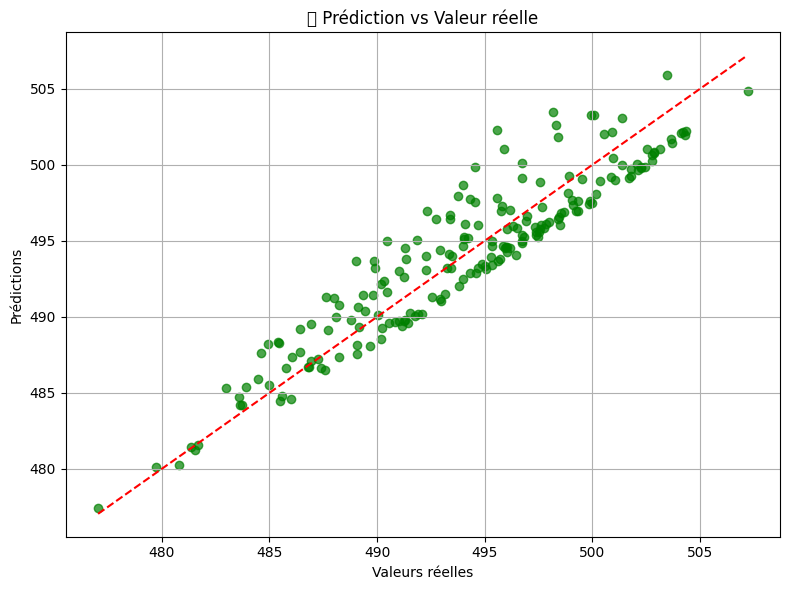

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Étape 1 : Charger la base de données réelle
df = pd.read_csv("car_insurance_premium_dataset.csv")  # 🔁 Remplace par ton chemin si besoin

# Étape 2 : Définir X et y
target = "Insurance Premium ($)"
X = df.drop(columns=[target])
y = df[target]

# Étape 3 : Diviser en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 4 : Supprimer les colonnes constantes (zéro variance)
X_train = X_train.loc[:, X_train.std() > 0]

# Étape 5 : Fonction VIF
def calculate_vif(df):
    vif = pd.Series(
        [variance_inflation_factor(df.values, i) for i in range(df.shape[1])],
        index=df.columns
    )
    return vif

def remove_multicollinearity(df, threshold=5.0):
    while True:
        vif = calculate_vif(df)
        if vif.max() > threshold:
            col_to_drop = vif.idxmax()
            print(f"❌ {col_to_drop} supprimée (VIF = {vif.max():.2f})")
            df = df.drop(columns=[col_to_drop])
            if df.shape[1] <= 1:
                print("🚫 Trop peu de variables restantes.")
                break
        else:
            print("✅ Aucune multicolinéarité restante.")
            break
    return df

# Étape 6 : Supprimer la multicolinéarité
X_train_clean = remove_multicollinearity(X_train)

# Étape 7 : Réentraîner sur les colonnes nettoyées
reg = LinearRegression()
reg.fit(X_train_clean, y_train)

# Étape 8 : Tester le modèle
X_test_clean = X_test[X_train_clean.columns]
y_pred = reg.predict(X_test_clean)

# Étape 9 : Évaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"\n📈 R² : {r2:.4f}")
print(f"📉 MSE : {mse:.2f}")

# Étape 10 : Visualisation des coefficients
coef_df = pd.DataFrame({
    "Variable": X_train_clean.columns,
    "Coefficient": reg.coef_
}).sort_values(by="Coefficient")



# Étape 11 : Visualisation des prédictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("🎯 Prédiction vs Valeur réelle")
plt.grid(True)
plt.tight_layout()
plt.show()


In [107]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')
data = pd.read_csv("car_insurance_premium_dataset.csv")  # remplace par le vrai nom de ton fichier


data.info()
data.isnull().any()

df = data.drop('Insurance Premium ($)', axis=1)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 1000 non-null   int64  
 1   Driver Experience          1000 non-null   int64  
 2   Previous Accidents         1000 non-null   int64  
 3   Annual Mileage (x1000 km)  1000 non-null   int64  
 4   Car Manufacturing Year     1000 non-null   int64  
 5   Car Age                    1000 non-null   int64  
 6   Insurance Premium ($)      1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age
0,56,32,4,17,2002,23
1,46,19,0,21,2025,0
2,32,11,4,15,2020,5
3,60,0,4,19,1991,34
4,25,7,0,13,2005,20


In [109]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]                              # extracts the feature values from the dataframe df, start from column 2
X = np.nan_to_num(X)                             # replaces any NaN (Not a Number) values in the array X with numerical values
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet


array([[ 1.63592078,  0.84331996, -0.21163858, -0.54420925,  0.54420925],
       [ 0.40240937, -1.51232238,  0.69570795,  1.6762649 , -1.6762649 ],
       [-0.35667457,  0.84331996, -0.66531184,  1.19355313, -1.19355313],
       ...,
       [-1.11575851,  1.43223054,  0.24203469, -0.93037867,  0.93037867],
       [ 0.30752388, -0.9234118 ,  1.14938122,  0.32467194, -0.32467194],
       [ 0.40240937, -0.33450121, -1.34582174, -0.54420925,  0.54420925]])

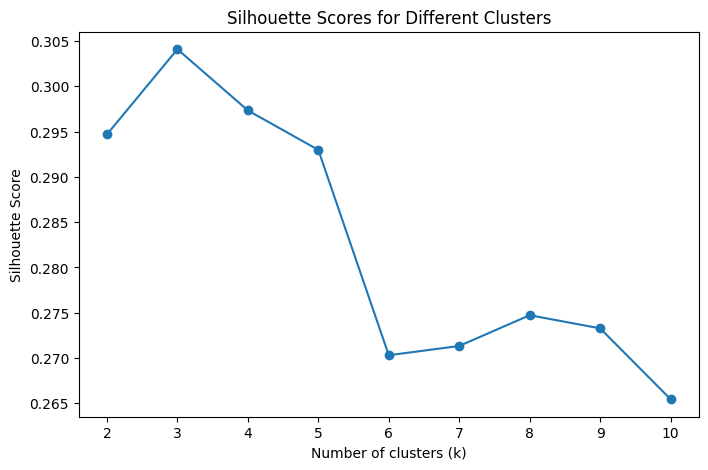

In [110]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [111]:
clusterNum = 4
k_means = KMeans(init="k-means++", n_clusters=clusterNum, n_init=12)
k_means.fit(df)


KMeans(n_clusters=4, n_init=12)

In [112]:
# Calcul des labels pour chaque instance
labels = k_means.labels_
print("Cluster Labels:\n", labels)

Cluster Labels:
 [0 2 3 0 1 1 0 1 3 3 3 3 2 0 3 1 0 3 3 0 2 0 3 3 0 3 3 2 1 0 0 0 3 1 2 0 3
 0 1 2 3 0 1 1 2 3 3 3 3 1 2 2 1 0 3 0 2 3 3 0 0 3 3 3 2 1 0 1 0 2 0 1 2 1
 2 0 1 3 3 3 0 2 1 0 3 2 3 3 2 0 0 2 3 0 3 0 1 3 2 1 0 3 2 3 1 3 0 2 2 1 2
 0 0 0 1 3 3 1 0 2 2 2 0 2 0 2 2 3 0 2 3 0 0 2 3 1 1 1 2 3 0 2 1 3 1 2 0 1
 0 0 2 3 0 0 0 2 2 1 0 2 0 3 2 3 2 0 1 2 2 1 0 0 2 0 1 0 3 2 2 2 0 1 3 3 2
 3 2 1 1 2 3 2 2 2 0 0 3 2 2 3 0 1 0 3 1 2 3 1 3 2 3 0 0 2 3 3 3 2 2 2 1 0
 3 3 3 2 0 1 0 1 3 3 2 1 0 1 1 1 2 3 3 0 1 0 3 3 1 2 3 0 0 2 0 3 0 1 3 2 0
 2 0 2 2 2 1 1 2 0 1 3 2 3 3 2 2 3 0 0 3 2 3 1 3 1 0 1 3 3 0 2 0 3 0 2 0 0
 2 2 3 2 1 3 0 3 2 2 0 1 2 1 3 2 1 1 1 3 1 2 0 1 2 3 0 2 2 0 2 1 0 2 0 1 2
 0 2 2 0 1 0 1 3 0 1 0 1 0 0 2 1 2 2 2 0 0 2 2 0 2 1 2 0 2 3 3 0 2 2 1 0 2
 0 0 0 2 3 1 1 0 3 2 3 0 2 1 2 0 0 1 0 0 2 0 1 1 3 0 0 1 3 1 0 1 3 1 2 1 0
 2 3 2 0 1 2 1 3 0 3 1 0 2 0 3 2 2 3 2 3 3 0 0 2 2 0 0 1 1 0 2 1 1 3 2 2 0
 0 0 1 3 3 3 0 0 2 0 2 2 2 3 3 2 3 2 2 3 1 2 3 2 1 0 1 2 1 0 2 2 1 3 1 2 0
 0 3 2 2

In [113]:
# Récupérer les centres des clusters
centers = k_means.cluster_centers_
print("\nCluster Centers:\n", centers)


Cluster Centers:
 [[  52.07307692   20.94615385    2.52307692   18.12307692 1998.67692308
    26.32307692]
 [  29.15668203    8.35483871    2.56682028   17.49769585 1997.73732719
    27.26267281]
 [  52.3202847    20.76868327    2.59430605   18.19217082 2016.25266904
     8.74733096]
 [  28.95454545    6.87603306    2.58677686   17.81818182 2016.13636364
     8.86363636]]


In [114]:
# Calculer l'inertie (la somme des distances au centre du cluster le plus proche)
inertia = k_means.inertia_
print("\nInertia:", inertia)


Inertia: 199092.53145966824


In [115]:
# Calculer le score de silhouette pour mesurer la qualité des clusters
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, labels)
print("\nSilhouette Score:", silhouette_avg)


Silhouette Score: 0.29733669835598564


In [116]:
# Ajouter les labels des clusters à ton DataFrame
df["Cluster"] = labels

In [117]:
# Afficher les 5 premières lignes avec les informations sur les clusters
print("\nFirst 5 rows with Cluster labels:")
print(df.head())




First 5 rows with Cluster labels:
   Driver Age  Driver Experience  Previous Accidents  \
0          56                 32                   4   
1          46                 19                   0   
2          32                 11                   4   
3          60                  0                   4   
4          25                  7                   0   

   Annual Mileage (x1000 km)  Car Manufacturing Year  Car Age  Cluster  
0                         17                    2002       23        0  
1                         21                    2025        0        2  
2                         15                    2020        5        3  
3                         19                    1991       34        0  
4                         13                    2005       20        1  


In [118]:
# Afficher la répartition des clusters (comptage des occurrences de chaque cluster)
print("\nCluster distribution:")
print(df["Cluster"].value_counts())


Cluster distribution:
Cluster
2    281
0    260
3    242
1    217
Name: count, dtype: int64


In [119]:
# Optionnel: Visualiser les clusters en utilisant matplotlib (si tu as deux ou trois dimensions)
import matplotlib.pyplot as plt
# Si tu as plus de 2 dimensions, tu pourrais utiliser PCA pour réduire les dimensions
from sklearn.decomposition import PCA

In [120]:
# Réduire à 2 dimensions pour la visualisation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df.drop(columns=["Cluster"]))  # Supposons que df contient tes caractéristiques sans 'Cluster'


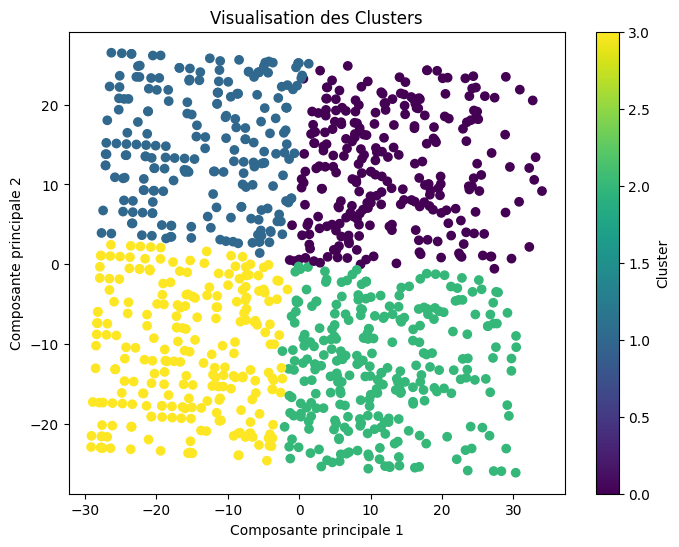

In [121]:
# Créer un graphique de dispersion avec les clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df["Cluster"], cmap='viridis')
plt.title('Visualisation des Clusters')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='Cluster')
plt.show()